<a href="https://colab.research.google.com/github/HannahGipmans/Public/blob/master/Pokemon_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1


1. EDA and UML

In [ ]:
#import nessecary libraries
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

In [ ]:
#load data
pokemon = pd.read_csv("https://sds-aau.github.io/SDS-master/00_data/pokemon.csv")

1.1 Give a brief overview of data, what variables are there, how are the variables scaled and
variation of the data columns.

In [ ]:
#look at data
pokemon.head()

,Number,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
pokemon = pokemon.drop(['Number'], axis=1)

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            800 non-null    object
 1   Type1           800 non-null    object
 2   Type2           414 non-null    object
 3   Total           800 non-null    int64 
 4   HitPoints       800 non-null    int64 
 5   Attack          800 non-null    int64 
 6   Defense         800 non-null    int64 
 7   SpecialAttack   800 non-null    int64 
 8   SpecialDefense  800 non-null    int64 
 9   Speed           800 non-null    int64 
 10  Generation      800 non-null    int64 
 11  Legendary       800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [ ]:
pokemon.shape

(800, 12)

In [ ]:
# There are 13 variables describing the 800 different pokemon. The type of the variables varies and includes strings, integers and booleans. 

In [ ]:
pokemon.Type1.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type1, dtype: int64

In [ ]:
pokemon.Type2.value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Rock        14
Water       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type2, dtype: int64

In [ ]:
pokemon = pokemon.dropna()

In [ ]:
pokemon.shape

(414, 12)

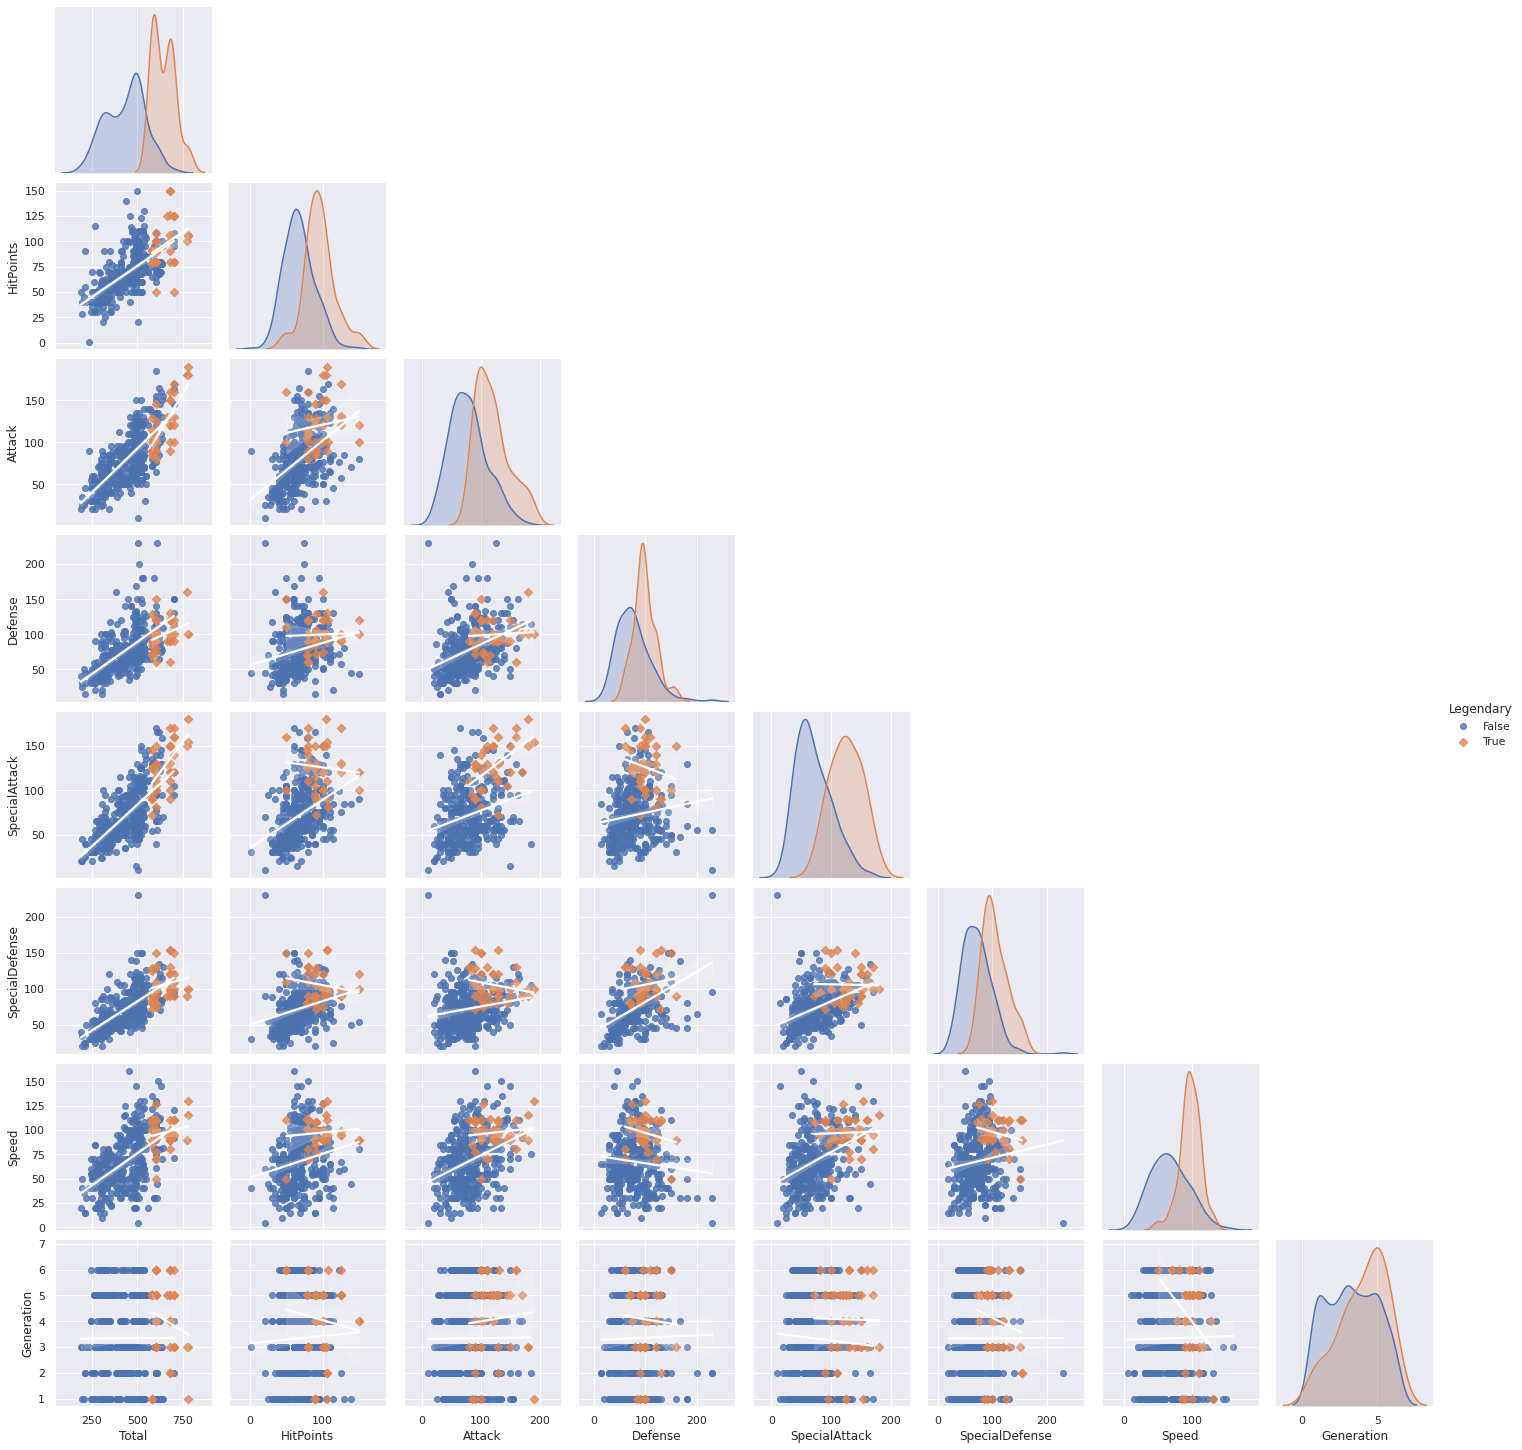

In [ ]:
sns.pairplot(pokemon, hue='Legendary', kind="reg", corner=True, markers=["o", "D"], plot_kws={'line_kws':{'color':'white'}})

In [ ]:
# description of above -> drop number?

1.2 Execute a PCA analysis on all numerical variables in the dataset. Hint: Don't forget to
scale them first. Use 4 components. What is the individuel and cumulative explained
variance?

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
pokemon_scaled = scaler.fit_transform(pokemon.iloc[:,4:12])

In [ ]:
pokemon_scaled.shape

(414, 8)

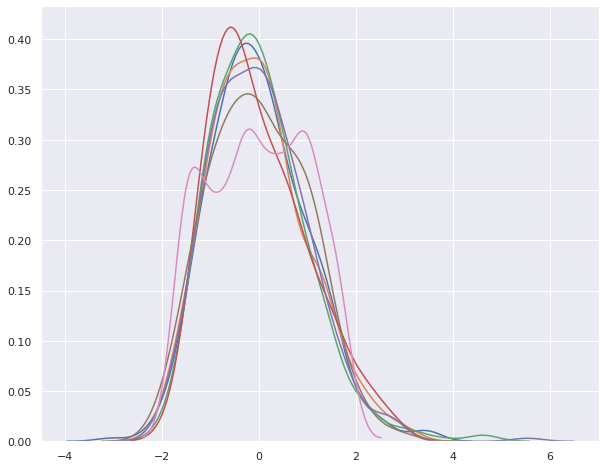

In [ ]:
# did the scaling work? all variables now have a mean of 0 and std of 1
for i in range(7):
  sns.distplot(pokemon_scaled[:,i], hist=False)

In [ ]:
# Importing PCA -> the assignment asks for 4 components
from sklearn.decomposition import PCA
pca = PCA(n_components=4) 

In [ ]:
# Use PCA to transform the data
pca_pokemon = pca.fit_transform(pokemon_scaled)

In [ ]:
pca_pokemon.shape #414 rows and 4 variables 

(414, 4)

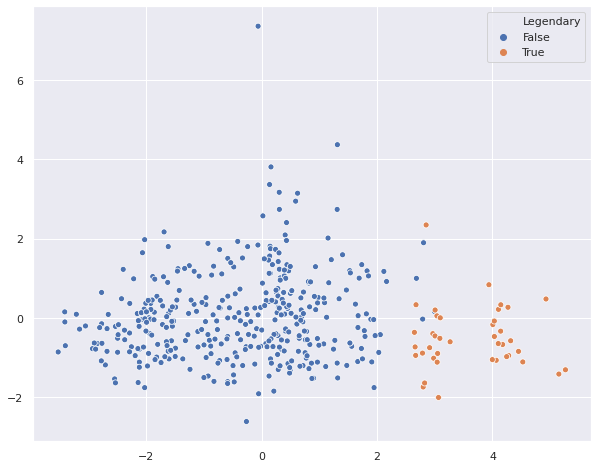

In [ ]:
sns.scatterplot(pca_pokemon[:,0], pca_pokemon[:,1], hue = pokemon['Legendary'] )

In [ ]:
print(pca.components_)  #shows 4 components

[[ 0.40027227  0.41325802  0.29595118  0.43341989  0.38286293  0.31111828
   0.07041972  0.38108066]
 [-0.06807571 -0.04824481  0.68673847 -0.18252049  0.39927509 -0.55314374
  -0.04994511 -0.14223776]
 [ 0.00430502  0.03076706 -0.01274759  0.1293282   0.06107414  0.10730255
  -0.97266628 -0.14430171]
 [-0.39320835 -0.61567625 -0.16570476  0.32866915  0.46670175  0.03814663
   0.00862925  0.33392861]]


In [ ]:
print(pca.explained_variance_) #shows explained variance

[3.11010308 1.18550677 1.01111112 0.80654884]


In [ ]:
print(pca.explained_variance_.cumsum()) #cumulative explained variance

[3.11010308 4.29560985 5.30672097 6.11326981]


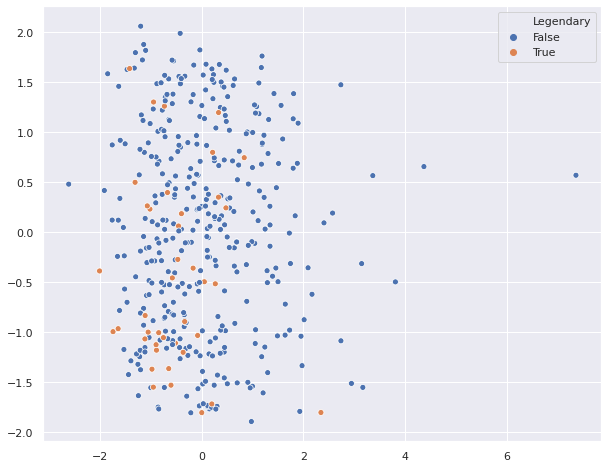

In [ ]:
sns.scatterplot(pca_pokemon[:,1],pca_pokemon[:,2], hue=pokemon.Legendary)

3.1 Use a different dimensionality reduction method (eg. UMAP/NMF) – do the findings differ?

In [ ]:
import umap 
reducer = umap.UMAP(n_components=4)

In [ ]:
umap_pokemon = reducer.fit_transform(pokemon_scaled) #perform UMAP
umap_pokemon.shape #check: variables were reduced to 4 components

(414, 4)

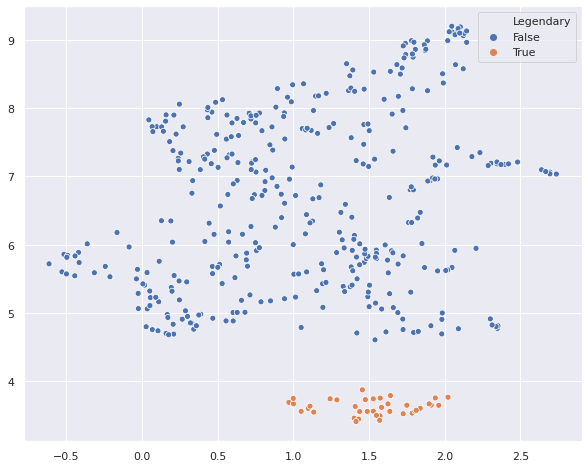

In [ ]:
sns.scatterplot(umap_pokemon[:,2], umap_pokemon[:,3], hue = pokemon['Legendary'] )  #plot two of the components against each other

In [ ]:
# how can we visualize it better?

1.4 Perform a cluster analysis (KMeans) on all numerical variables (scaled & before PCA). Pick a realistic number of clusters (up to you where the large clusters remain mostly
stable).

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clusterer = KMeans(n_clusters=3) # 3 clusters turned out to be a good fit, otherwise they get messy
clusterer.fit(pokemon_scaled) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

1.5 Visualize the first 2 principal components and color the datapoints by cluster.

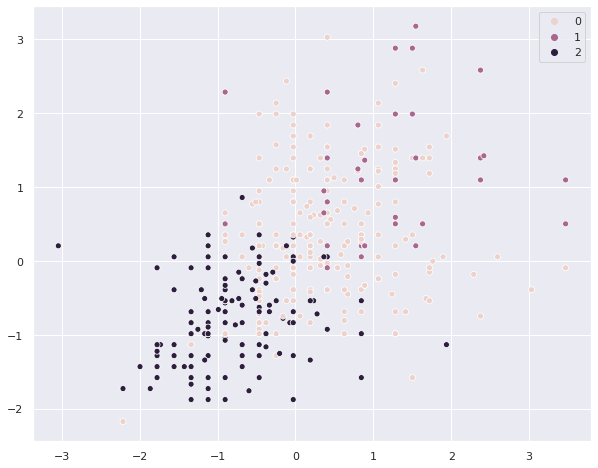

In [ ]:
sns.scatterplot(pokemon_scaled[:,0], pokemon_scaled[:,1], hue = clusterer.labels_ )

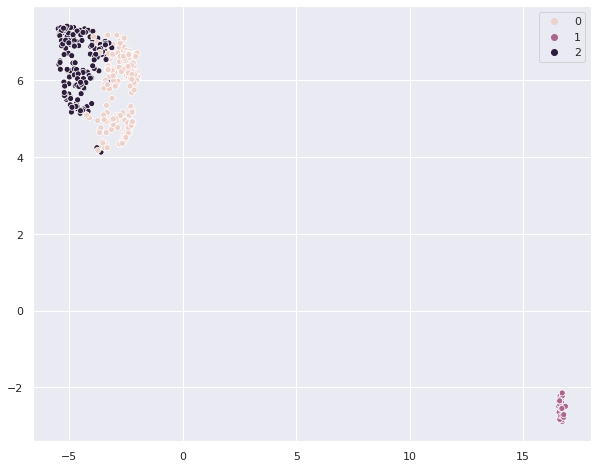

In [ ]:
sns.scatterplot(umap_pokemon[:,0], umap_pokemon[:,1], hue = clusterer.labels_ )

1.6 Inspect the distribution of the variable “Type1” across clusters. Does the algorithm
separate the different types of pokemon?

In [ ]:
pd.crosstab(clusterer.labels_, pokemon['Type1'])

Type1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
row_0,,,,,,,,,,,,,,,,,,
0,24,12,7,11,1,5,14,1,10,19,10,6,16,8,8,18,14,35
1,0,1,12,3,0,0,4,0,2,2,3,1,0,0,5,3,3,1
2,28,8,2,3,1,2,6,1,10,16,6,4,21,5,6,14,5,17


In [ ]:
# looks quite random. doesn't seem like the clusters are fit to specific species. Most of the time one Type is spread across 2 clusters. 

1.7 Perform a cluster analysis on all numerical variables scaled and AFTER dimensionality reduction and visualize the first 2 principal components.

In [ ]:
clusterer = KMeans(n_clusters=3) # 3 clusters turned out to be a good fit, otherwise they get messy
clusterer.fit(umap_pokemon) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

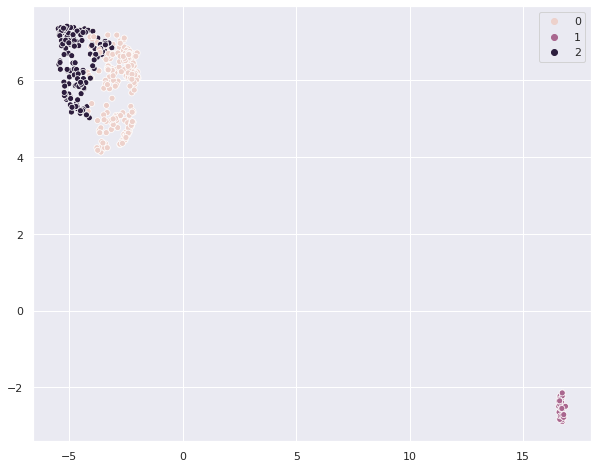

In [ ]:
sns.scatterplot(umap_pokemon[:,0], umap_pokemon[:,1], hue = clusterer.labels_ )

In [ ]:
# when just regarding the first two components it seems like the clusters work better when drawn from the dimensionality-
# reduced data compared to the scaled data. The clusters are more separated and don't overlap as much. The legendary pokemons fit perfectly into
# a group that is very distinct from the other groups.

1.8 Again, inspect the distribution of the variable “Type 1” across clusters, does it differ from
the distribution before dimensionality reduction?

In [ ]:
pd.crosstab(clusterer.labels_, pokemon['Type1'])

Type1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
row_0,,,,,,,,,,,,,,,,,,
0,32,12,7,12,1,6,14,1,11,21,10,6,17,8,9,20,14,36
1,0,1,12,3,0,0,4,0,2,2,3,1,0,0,5,3,3,1
2,20,8,2,2,1,1,6,1,9,14,6,4,20,5,5,12,5,16


In [ ]:
# The grouping of Type1 into the clusters is very similar to above. There are only small changes.

# PART 2

2.1 Perform necessary ML preprocessing of your data if deemed necessary.

In [ ]:
pokemon.head()

,Name,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


In [ ]:
X = pokemon.iloc[:,1:11]  # define explanatory variables
X.shape

(414, 10)

In [ ]:
X

,Type1,Type2,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation
0,Grass,Poison,318,45,49,49,65,65,45,1
1,Grass,Poison,405,60,62,63,80,80,60,1
2,Grass,Poison,525,80,82,83,100,100,80,1
3,Grass,Poison,625,80,100,123,122,120,80,1
6,Fire,Flying,534,78,84,78,109,85,100,1
...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6
796,Rock,Fairy,700,50,160,110,160,110,110,6
797,Psychic,Ghost,600,80,110,60,150,130,70,6
798,Psychic,Dark,680,80,160,60,170,130,80,6


In [ ]:
X = pd.get_dummies(X)  #create dummy variables for categorical variables

In [ ]:
X.shape  # check if shape is as wanted

(414, 44)

In [ ]:
X.head()

,Total,HitPoints,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Type1_Bug,Type1_Dark,Type1_Dragon,Type1_Electric,Type1_Fairy,Type1_Fighting,Type1_Fire,Type1_Flying,Type1_Ghost,Type1_Grass,Type1_Ground,Type1_Ice,Type1_Normal,Type1_Poison,Type1_Psychic,Type1_Rock,Type1_Steel,Type1_Water,Type2_Bug,Type2_Dark,Type2_Dragon,Type2_Electric,Type2_Fairy,Type2_Fighting,Type2_Fire,Type2_Flying,Type2_Ghost,Type2_Grass,Type2_Ground,Type2_Ice,Type2_Normal,Type2_Poison,Type2_Psychic,Type2_Rock,Type2_Steel,Type2_Water
0,318,45,49,49,65,65,45,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,534,78,84,78,109,85,100,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 799
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Total           414 non-null    int64
 1   HitPoints       414 non-null    int64
 2   Attack          414 non-null    int64
 3   Defense         414 non-null    int64
 4   SpecialAttack   414 non-null    int64
 5   SpecialDefense  414 non-null    int64
 6   Speed           414 non-null    int64
 7   Generation      414 non-null    int64
 8   Type1_Bug       414 non-null    uint8
 9   Type1_Dark      414 non-null    uint8
 10  Type1_Dragon    414 non-null    uint8
 11  Type1_Electric  414 non-null    uint8
 12  Type1_Fairy     414 non-null    uint8
 13  Type1_Fighting  414 non-null    uint8
 14  Type1_Fire      414 non-null    uint8
 15  Type1_Flying    414 non-null    uint8
 16  Type1_Ghost     414 non-null    uint8
 17  Type1_Grass     414 non-null    uint8
 18  Type1_Ground    414 non-null  

In [ ]:
y = pokemon.Legendary   # define the dependent variable / the outcome 

In [ ]:
from sklearn.preprocessing import StandardScaler   # scale variables to get tbe same standard deviation and mean for better comparison
scaler = StandardScaler()

In [ ]:
X.iloc[:,:8] = scaler.fit_transform(X.iloc[:,:8])

In [ ]:
X.shape  # check if shape is correct

(414, 44)

2.2 Split the data in a training (75%) and test (25%) dataset.




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

2.3 Define a n-fold cross-validation workflow for your model testing.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier

# scorer = make_scorer(r2_score)
scorer = make_scorer(mean_squared_error)

In [ ]:
model_rf_cross = RandomForestRegressor()  # we are performing 5-fold cross-validation on the random forest model

In [ ]:
parameters_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [25, 50]}

In [ ]:
grid_obj = GridSearchCV(model_rf_cross, parameters_rf, scoring=scorer) # Perform grid search on the classifier using 'scorer' as the scoring method.
# cv: None, to use the default 5-fold cross validation

In [ ]:
grid_fit = grid_obj.fit(X, y)

In [ ]:
best_reg = grid_fit.best_estimator_ # Get the estimator.

In [ ]:
best_reg.fit(X_train, y_train) # Fit the new model.

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
best_reg.score(X_test, y_test) 

0.6185978250591015

2.4 Fit three separate models on your training data, where you predict the “legendary”
variable. Use a 1. Logistic regression, 2. Decision tree, and 3. (minimum) one adittional
SML algorithm of choice to do so.

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(multi_class="ovr") 
model_lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_lg.score(X_test, y_test)

0.9615384615384616

In [ ]:
# Decision Tree - Random Forest

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model_rf.score(X_test, y_test)

0.7176842553191489

In [ ]:
# XGB Regression

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model_xgb.score(X_test, y_test)

0.9711538461538461

In [ ]:
print('Model LG' + ' ' + str(model_lg.score(X_test, y_test)))
print('Model RF' + ' ' + str(model_rf.score(X_test, y_test)))
print('Model XGB' + ' ' + str(model_xgb.score(X_test, y_test)))

Model LG 0.9615384615384616
Model RF 0.7176842553191489
Model XGB 0.9711538461538461


2.5 Use the fitted models to predict the “legendary” variable in your test data.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
# Predict Legendary with Logistic

true_pokemon = y_test

predicted_pokemon_lg = model_lg.predict(X_test)

print(classification_report(true_pokemon,predicted_pokemon_lg))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98        94
        True       0.80      0.80      0.80        10

    accuracy                           0.96       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.96      0.96      0.96       104



In [ ]:
print(predicted_pokemon_lg)

[False False False False False False False False  True False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False  True  True False  True  True]


In [ ]:
df = pd.DataFrame({'true_pokemon': true_pokemon, 'predicted_pokemon_lg': predicted_pokemon_lg}) 

pd.crosstab(df.true_pokemon, df.predicted_pokemon_lg)

predicted_pokemon_lg,False,True
true_pokemon,,
False,92,2
True,2,8


In [ ]:
# Predict Legendary with Random Forest

true_pokemon = y_test

predicted_pokemon_rf = np.round(model_rf.predict(X_test))  #rounded continuous values up or down to get boolean values

print(classification_report(true_pokemon,predicted_pokemon_rf))


              precision    recall  f1-score   support

       False       0.98      0.98      0.98        94
        True       0.80      0.80      0.80        10

    accuracy                           0.96       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.96      0.96      0.96       104



In [ ]:
print(predicted_pokemon_rf)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0.]


In [ ]:
df = pd.DataFrame({'true_pokemon': true_pokemon, 'predicted_pokemon_rf': predicted_pokemon_rf}) 

pd.crosstab(df.true_pokemon, df.predicted_pokemon_rf)

predicted_pokemon_rf,0.0,1.0
true_pokemon,,
False,92,2
True,2,8


In [ ]:
# Predict Legendary with XGB

true_pokemon = y_test

predicted_pokemon_xgb = model_xgb.predict(X_test)

print(classification_report(true_pokemon,predicted_pokemon_xgb))

              precision    recall  f1-score   support

       False       0.98      0.99      0.98        94
        True       0.89      0.80      0.84        10

    accuracy                           0.97       104
   macro avg       0.93      0.89      0.91       104
weighted avg       0.97      0.97      0.97       104



In [ ]:
print(predicted_pokemon_xgb)

[False False False False False False False False  True False False False
 False False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False  True False False  True False]


In [ ]:
df = pd.DataFrame({'true_pokemon': true_pokemon, 'predicted_pokemon_xgb': predicted_pokemon_xgb}) 

pd.crosstab(df.true_pokemon, df.predicted_pokemon_xgb)

predicted_pokemon_xgb,False,True
true_pokemon,,
False,93,1
True,2,8


2.6 Evaluate the performance of these 3 models by comparing the predicted and the true
values of “legendary” in the test data. To do so, also create a confusion matrix, provide
and discuss further useful metrics of model performance.

In [ ]:
# write something here

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# Confusion Matrix Logistic

from sklearn.metrics import confusion_matrix

cm_lg = confusion_matrix(y_test, predicted_pokemon_lg)

cm_lg  # same as above

array([[92,  2],
       [ 2,  8]])

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe4f9f98668>)

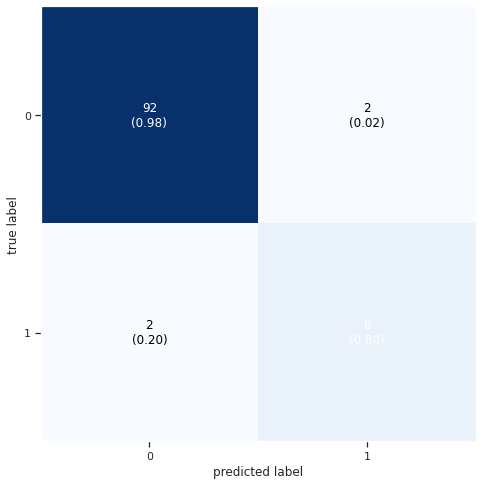

In [ ]:
plot_confusion_matrix(conf_mat=cm_lg,
                                show_absolute=True,
                                show_normed=True)

In [ ]:
# Confusion Matrix Random Forest

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, predicted_pokemon_rf)

cm_rf  # same as above

array([[92,  2],
       [ 2,  8]])

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe4f9f98550>)

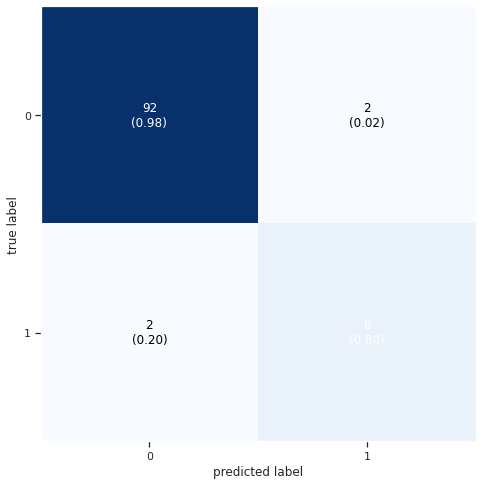

In [ ]:
plot_confusion_matrix(conf_mat=cm_rf,
                                show_absolute=True,
                                show_normed=True)

In [ ]:
# Confusion Matrix Random Forest

from sklearn.metrics import confusion_matrix

cm_xgb = confusion_matrix(y_test, predicted_pokemon_xgb)

cm_xgb  # same as above

array([[93,  1],
       [ 2,  8]])

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe4fa2e72b0>)

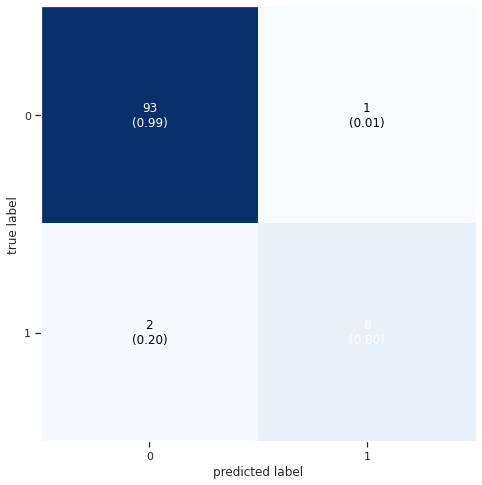

In [ ]:
plot_confusion_matrix(conf_mat=cm_xgb,
                                show_absolute=True,
                                show_normed=True)

In [ ]:
# Other useful metrics:

In [ ]:
# Accuracy = (TP+TN)/(P+N)

accuracy_lg = ((92+8)/104)
accuracy_rf = ((92+8)/104)
accuracy_xgb = ((93+8)/104)

In [ ]:
print(accuracy_lg)
print(accuracy_rf)
print(accuracy_xgb)

0.9615384615384616
0.9615384615384616
0.9711538461538461


In [ ]:
# Sensitivity = TP / P
sensitivity_lg = 8/10
sensitivity_rf = 8/10
sensitivity_xgb = 8/10

In [ ]:
print(sensitivity_lg)
print(sensitivity_rf)
print(sensitivity_xgb)

0.8
0.8
0.8
